# Assignement -1  : Computation Neuroscience
Find the solution of Van der Pol equation and plot the result for multiple $\mu$ values. 

Problem Statement: https://informationprocessinglab.weebly.com/uploads/3/8/7/9/38794607/cn_project_i_17_18.pdf

## Van-Der-Pol Equation##

$$y''-\mu(1-y^2)y'+y = 0 \\ \mu >0$$

**a.) Reduce the VDP equation to two first order differential equations**

$$x = \begin{pmatrix}y\\ y' \end{pmatrix}$$

$$x' = \begin{pmatrix}y'\\ y'' \end{pmatrix}$$

$$x' = \begin{pmatrix}y'\\ \mu(1-y^2)y'-y \end{pmatrix}$$

So Equations, 

$$\begin{cases} { y_1 = y'\\ y_1' = \mu(1-y^2)y_1 - y} \end{cases}$$ 



Alternative way 

$$\begin{cases} y_1 = -\frac{y}{\mu}\\ y' = \mu(y_1+x -\frac{y^3}{3})\end{cases}$$


**b.) Initial condition $x = \begin{pmatrix}1\\0 \end{pmatrix}$**

Function used 

**ODE45**:  `scipy.integrate.ode(vdp1).set_integrator("dopri5")`

**ODE15s**:  `scipy.integrate.ode(vdp1).set_integrator('vode', method='bdf', order=15)`

**c.) Run  your  program  for $\mu$= 1, $\mu$ =  0.1  and $\mu$ = 100 using  ODE45  to  solve  the equations.  The  VDP  is  stiff  for $\mu$ = 100  meaning  there  are  a  mixture  of  large and small  time  constants,  which  is  a  difficult  situation  for  ODE  solvers.  Compare  the speed  with  which  the  simulations  run  with  ODE45  and  ODE15s  (does  not  mean ODE15s is always better)**

The ODE15s is faster than ODE45. The time taken to run each simulation us written on the figure

$\mu$ \ Time | ODE45 (sec) | ODE15s (sec) 
------|-------|--------
  0.1 | 5.38     | 1.21      
 1    | 5.571     | 1.12      
 100  | 5.68     | 2.19     




**d.) Write a routine to plot your solution in the phase plane. Comment on the behavior  of  the  oscillator  as  it  converges  from  initial  condition  towards  a  steady  state  of periodic oscillation.**

Phase Plane : The graph betweenn y and y'.

Code :


```Python
plt.plot(y[:,0],y[:,1],color='red')
```
We see that if $\mu$ is small (0.1 or 1), the equilibrium is an unstable spiral. Form larger values, the equilibrium is an unstable node. From the examples, it looks like, the final values does not depend on the initial conditions.


In [17]:
# Libraries
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt
import matplotlib
import time

font = {'family' : 'Monaco',
        'size'   : 22}

matplotlib.rc('font', **font)



def __solution(method="ODE45", mu=0.1, tmax=50, inital=[1,0], color='red'):
    """
    Function to calculate the solution of ODE and plot the graphs
    """
    Mu = mu
    
    def vdp1(t, y):
        """
        ODE
        """
        return np.array([y[1], Mu*(1 - y[0]**2)*y[1] - y[0]])
    t0, t1 = 0, tmax                # start and end
    t = np.linspace(t0, t1, 200000)  # the points of evaluation of solution
    y0 = inital                   # initial value
    y = np.zeros((len(t), len(y0)))   # array for solution
    y[0, :] = y0
    
    start = time.time()
    # Choose the method
    if method =="ODE45":
        r = integrate.ode(vdp1).set_integrator("dopri5")  # choice of method
    if method =="ODE15s":
        r = integrate.ode(vdp1).set_integrator('vode', method='bdf', order=15)
    r.set_initial_value(y0, t0)   # initial values
    for i in range(1, t.size):
        y[i, :] = r.integrate(t[i]) # get one more value, add it to the array
        if not r.successful():
            raise RuntimeError("Could not integrate")
    end = time.time()
    
    # Ploting
    plt.figure(figsize=(30,15))
    plt.subplot(1,2,1)
    plt.plot(t, y)
    plt.title("{} Time: {} Mu: {}".format(method, round(end-start, 2), mu))
    plt.xlabel("Solutions")
    plt.ylabel("Value")
    plt.legend(["y","y'"])
    plt.grid()
    
    plt.subplot(1,2,2)
    plt.plot(y[:,0],y[:,1],color=color)
    plt.xlabel("y")
    plt.ylabel("y'")
    plt.title("{} Phase Plane".format(method, round(end-start, 2), mu))
    plt.grid()

def solutions(mu=0.1,tmax=50, inital=[1,0], color='red'):
    """
    Function to plot the graphs for ttwo different methods
    """
    __solution(method="ODE45",mu=mu, tmax=tmax, inital=inital, color=color)
    __solution(method="ODE15s",mu=mu, tmax=tmax, inital=inital, color=color)    

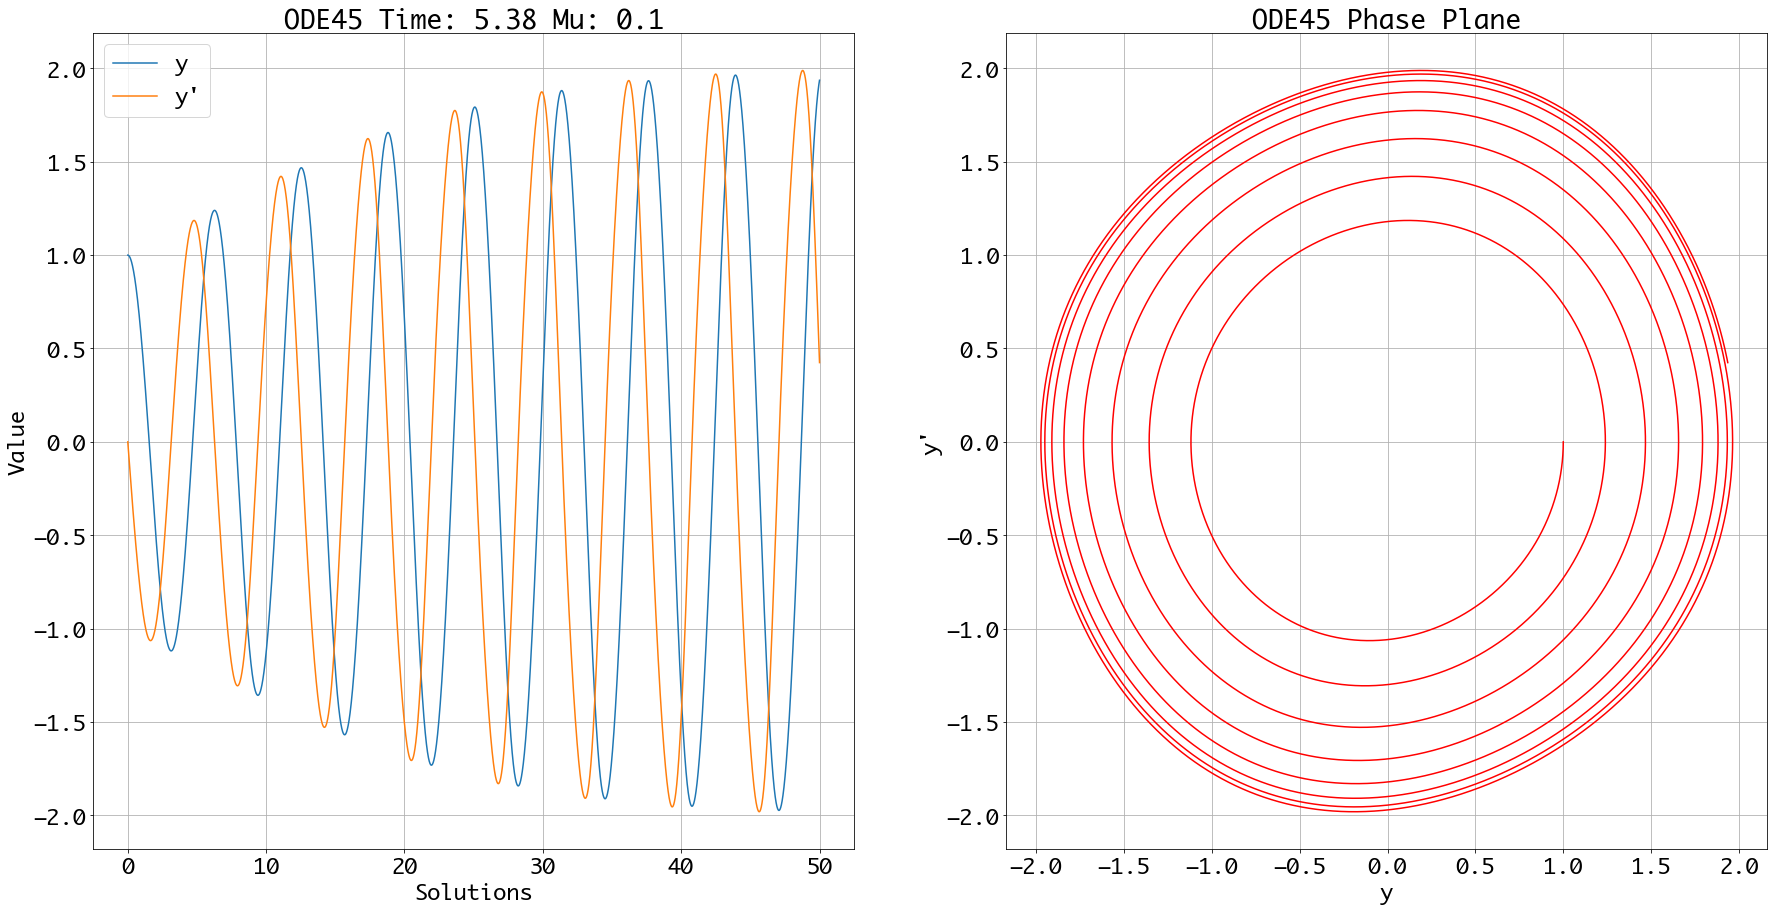

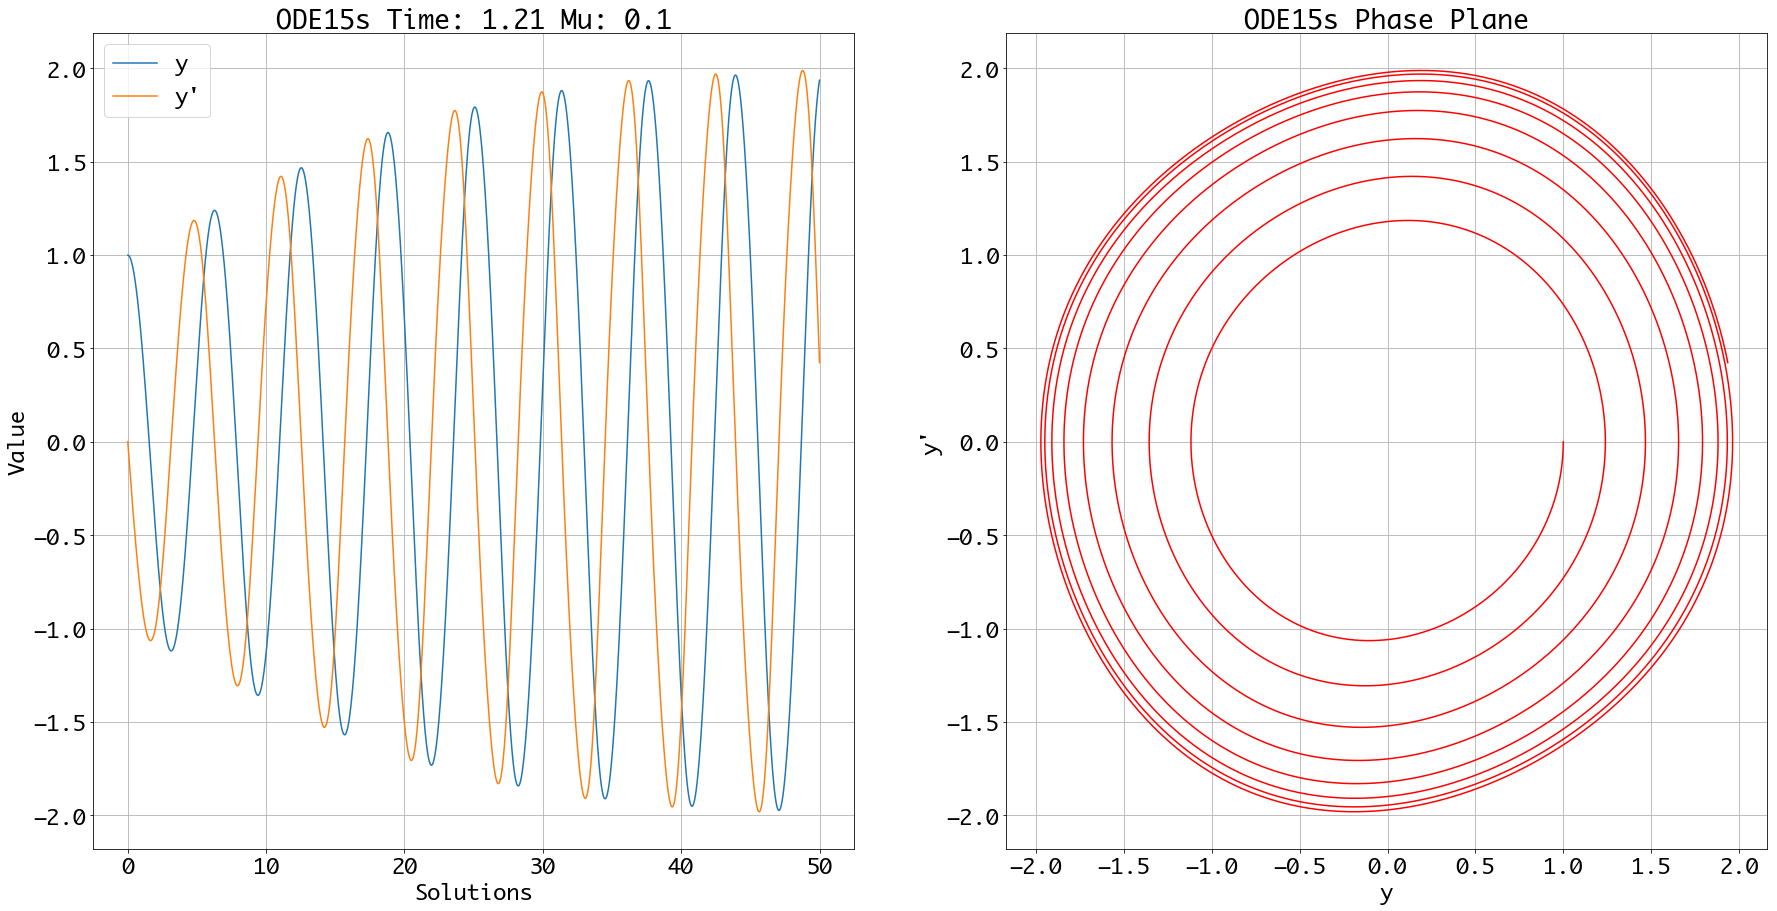

In [19]:
# mu = 0.1
solutions(mu=0.1)

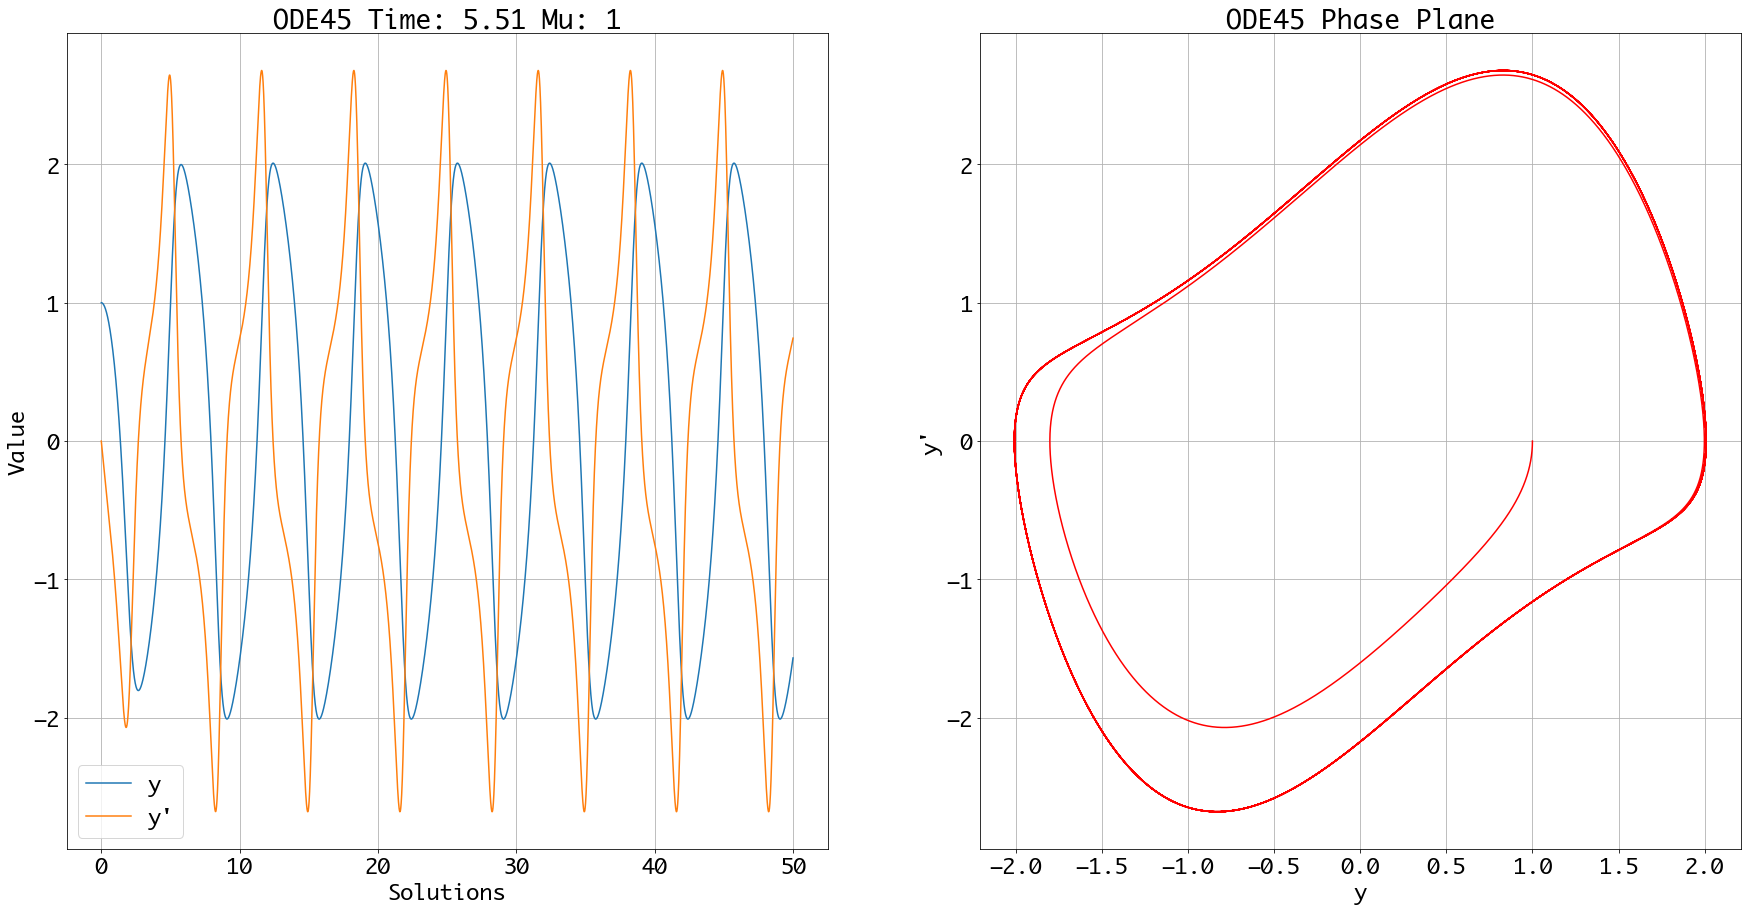

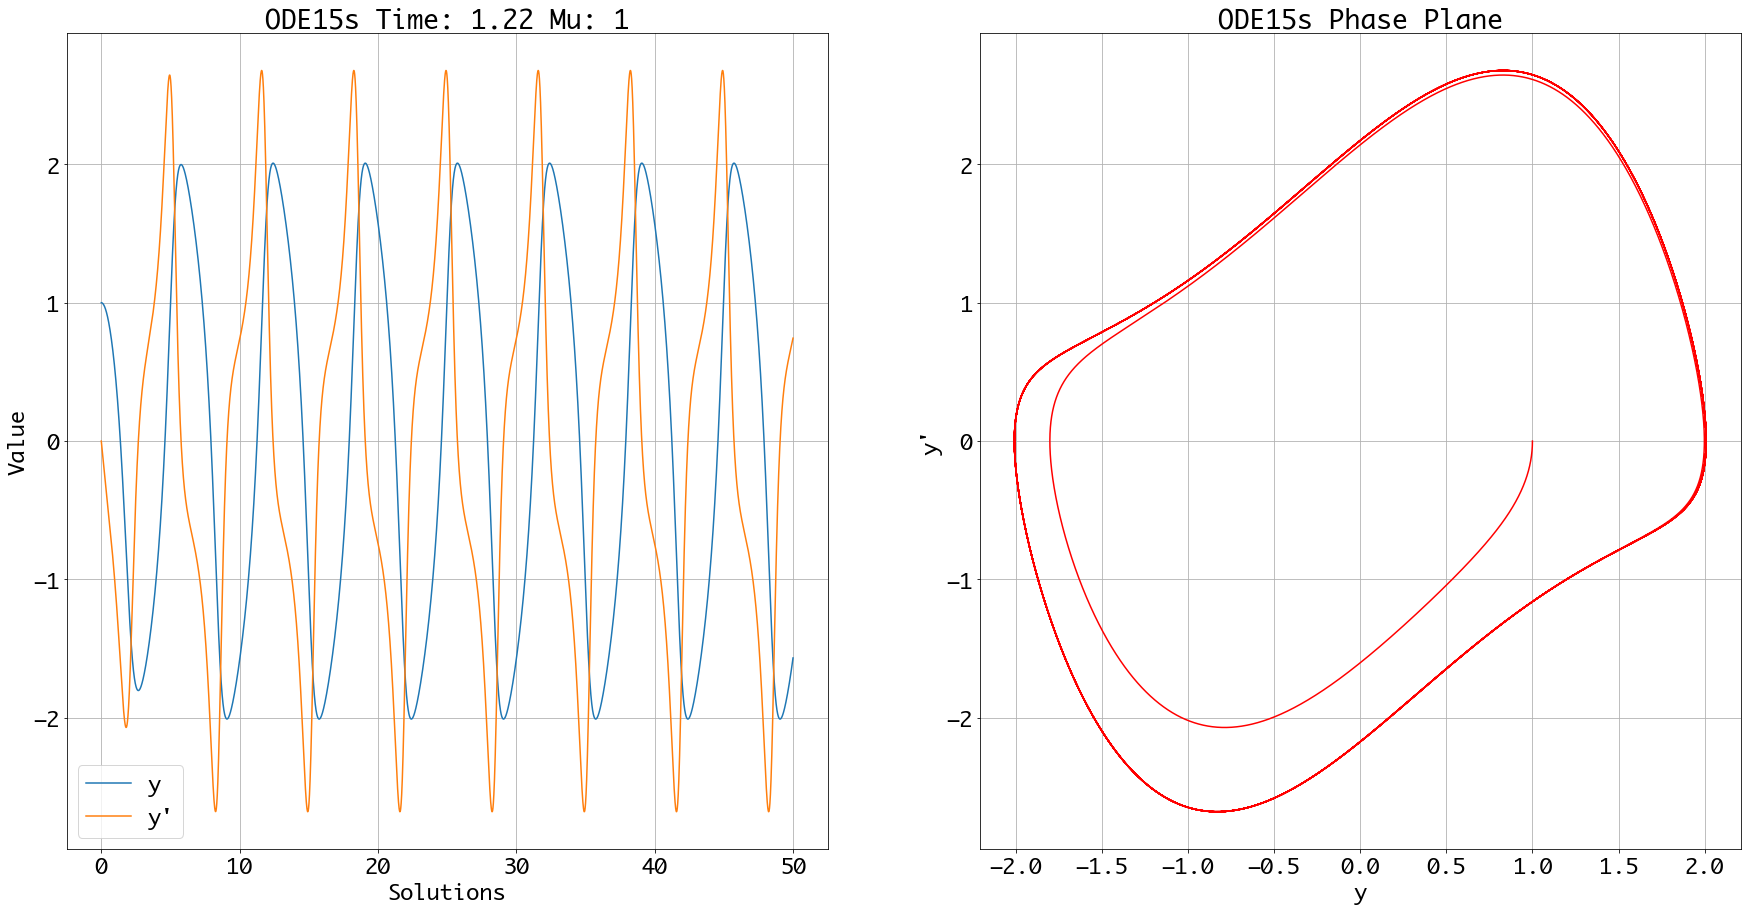

In [11]:
# mu = 1
solutions(1)

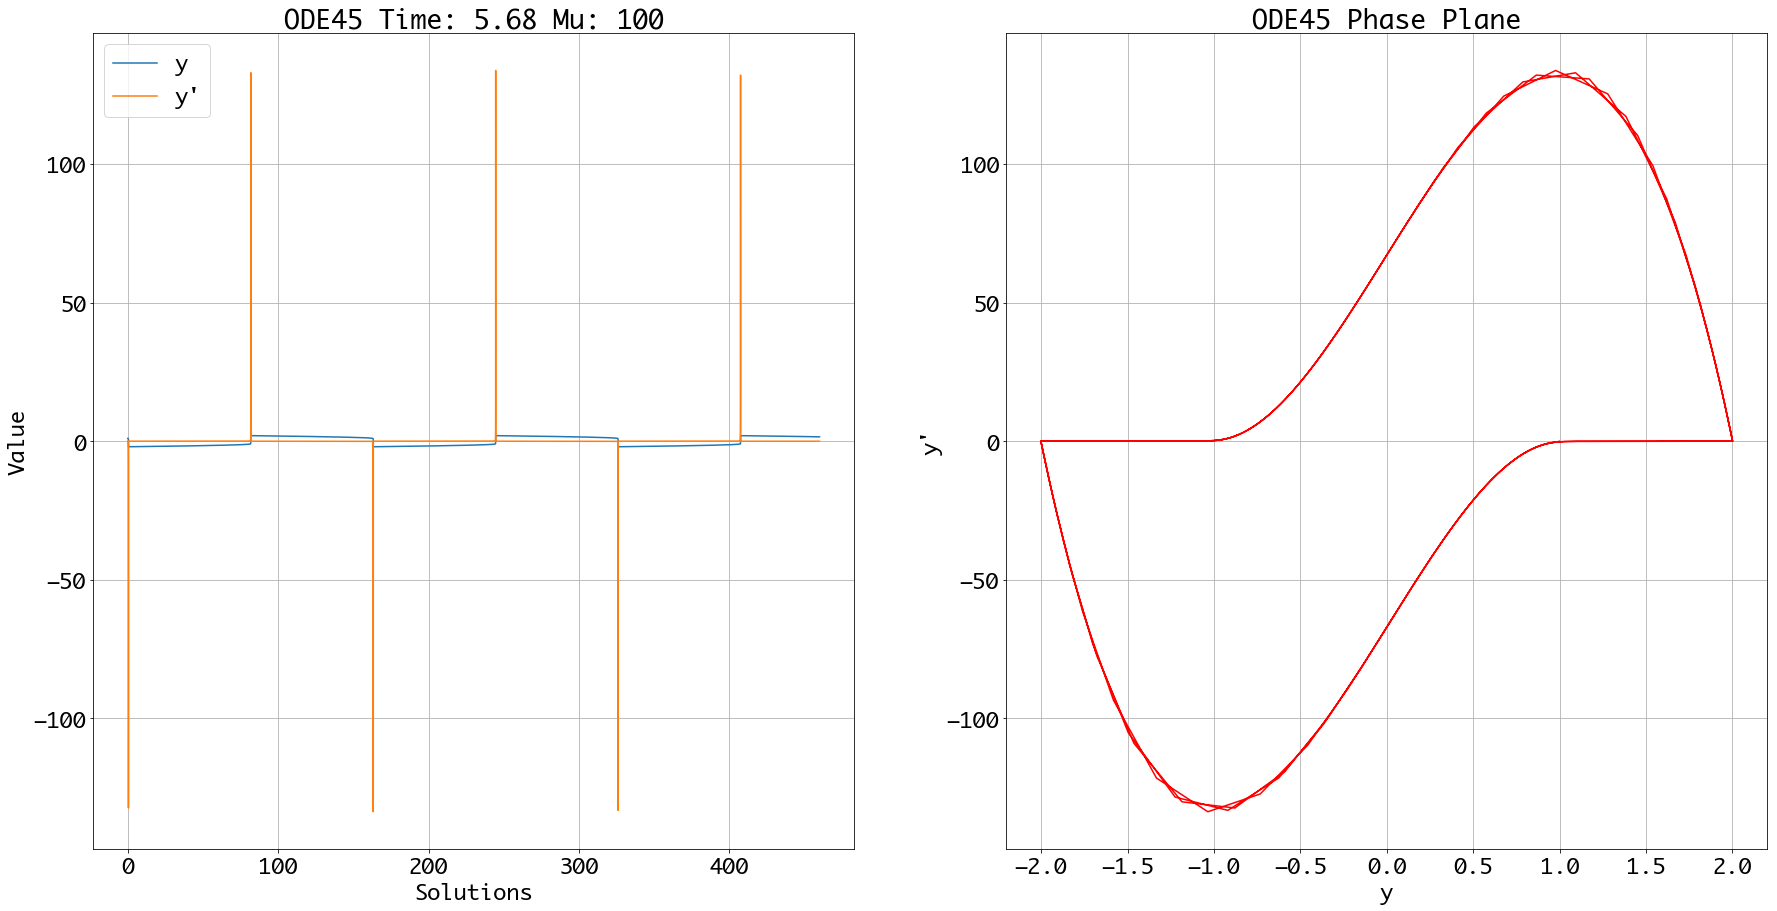

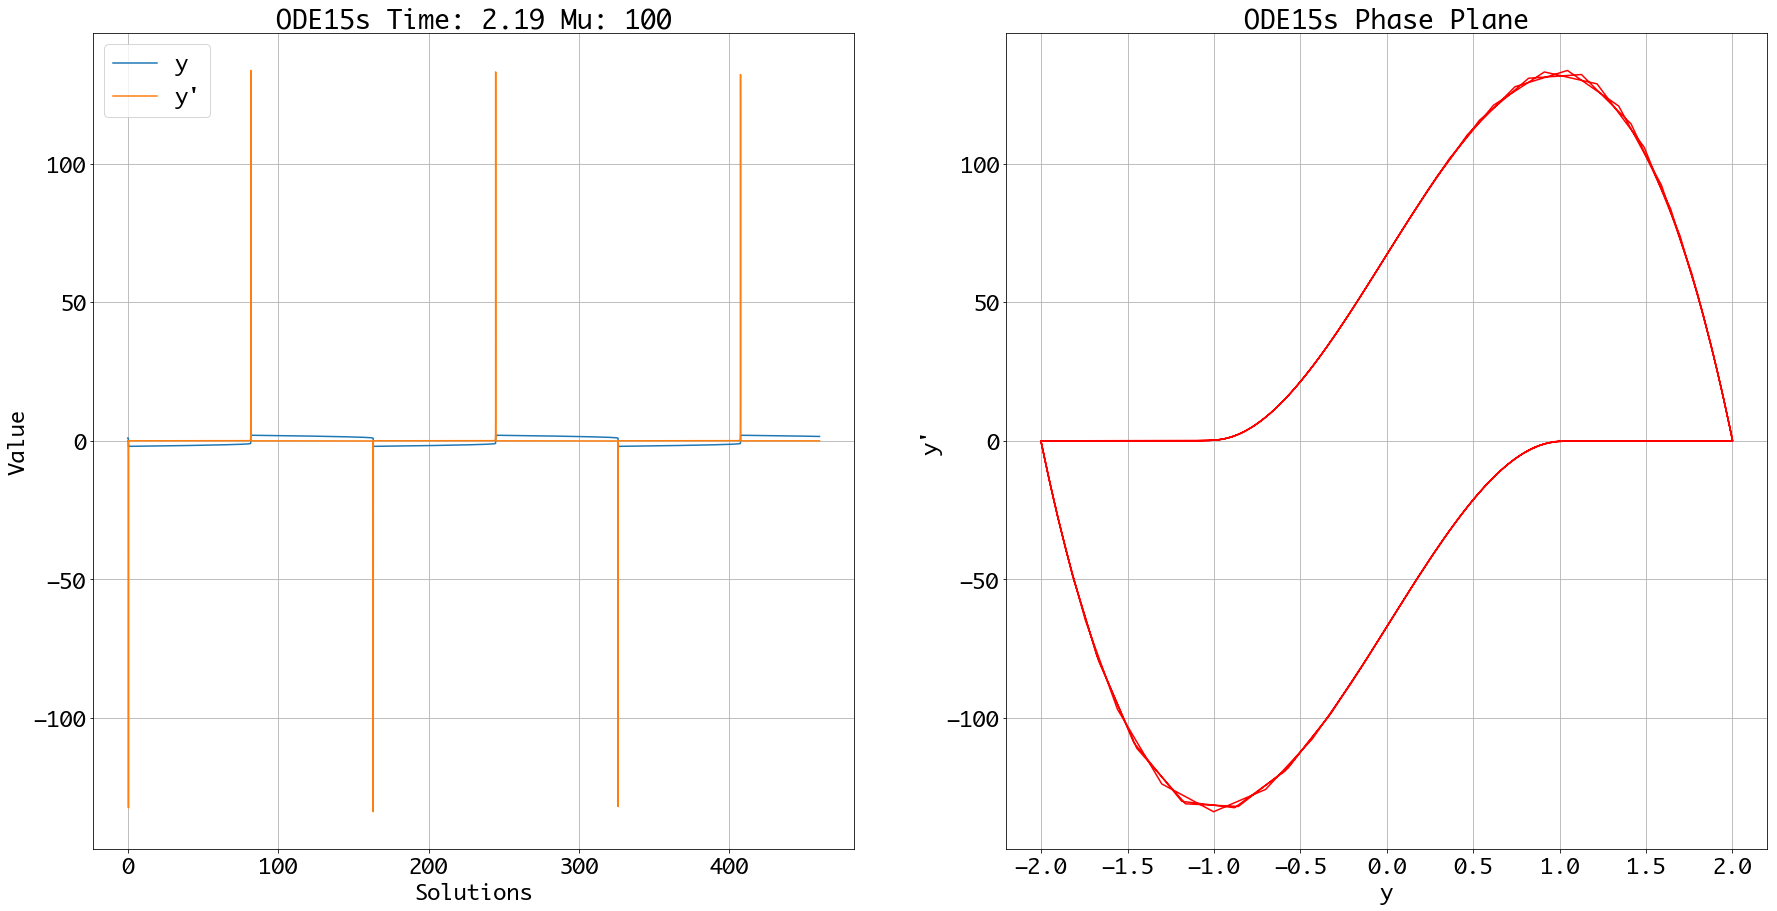

In [12]:
# mu = 100
solutions(100,tmax=460)